In [1]:
import arcpy

In [3]:
# Set environment settings
arcpy.env.workspace = r"C:\Users\thier\Downloads\Projet\Projet"

In [2]:
# Set local variables
inRaster = "Utilisation_Territoire.tif"
outPolygons = "test.shp"
field = "DESC_CAT"

# Run RasterToPolygon
arcpy.conversion.RasterToPolygon(inRaster, outPolygons, "NO_SIMPLIFY", field)

<Result 'C:\\Users\\thier\\Downloads\\Projet\\Projet\\test.shp'>

In [11]:
import pandas


In [ ]:
shapefile = "buffers_2km.shp" # Replace with your shapefile name

# Use a search cursor to iterate through the shapefile
with arcpy.da.SearchCursor(shapefile, ["*"]) as cursor:
    for row in cursor:
        print(row)  # or any operation you want to perform


In [16]:
# Set local variables
in_features = "test.shp"
clip_features = "buffers_1km.shp"
out_feature_class = "buffer_sol_1km_test3.shp"
xy_tolerance = ""

# Run Clip
arcpy.analysis.Clip(in_features, clip_features, out_feature_class)

<Result 'C:\\Users\\thier\\Downloads\\Projet\\Projet\\buffer_sol_1km_test3.shp'>

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [1]:
import whitebox
wbt = whitebox.WhiteboxTools()


In [ ]:
wbt.clip(
    i=r"C:\Users\thier\Downloads\Projet\Projet\test.shp", 
    clip=r"C:\Users\thier\Downloads\Projet\Projet\buffers_2km.shp", 
    output=r"C:\Users\thier\Downloads\Projet\Projet\clip_test2.shp"
)

In [79]:
gdf = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\clip_test2.shp")
gdf.head(50)

,Id,gridcode,DESC_CAT,geometry
0,3363,6,Anthropique,"POLYGON ((664547.528 5150891.218, 664535.840 5..."
1,3364,6,Anthropique,"POLYGON ((664734.527 5150891.218, 664734.527 5..."
2,3381,3,Forestier,"POLYGON ((664547.528 5150879.409, 664535.840 5..."
3,3382,6,Anthropique,"POLYGON ((664570.902 5150879.409, 664547.528 5..."
4,3383,3,Forestier,"POLYGON ((664839.714 5150884.744, 664839.714 5..."
5,3400,6,Anthropique,"POLYGON ((664582.590 5150867.600, 664570.902 5..."
6,3401,6,Anthropique,"POLYGON ((664722.839 5150867.600, 664722.839 5..."
7,3419,6,Anthropique,"POLYGON ((664594.277 5150855.790, 664582.590 5..."
8,3420,6,Anthropique,"POLYGON ((664722.839 5150855.790, 664711.152 5..."
9,3431,6,Anthropique,"POLYGON ((664605.965 5150843.981, 664594.277 5..."


In [80]:
coupe_rows = gdf[gdf['DESC_CAT'].str.contains('Coupe', case=False, na=False)]
coupe_rows

,Id,gridcode,DESC_CAT,geometry
41,3635,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((665283.836 5150690.460, 665272.149 5..."
114,3975,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((663589.158 5150253.515, 663565.783 5..."
213,4393,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((666031.832 5149863.807, 666031.832 5..."
215,4401,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((666043.520 5149875.616, 666043.520 5..."
216,4401,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((666207.144 5150086.213, 666207.144 5..."
...,...,...,...,...
8015,26644,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674061.103 5129516.339, 674049.416 5..."
8027,26657,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674072.790 5129504.530, 674061.103 5..."
8111,26767,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674201.352 5129398.246, 674201.352 5..."
8112,26767,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674228.522 5129469.102, 674236.415 5..."


In [65]:
new_name = 'Coupe'
gdf.loc[gdf['DESC_CAT'] == 'Coupe et rÃ©gÃ©nÃ©rat', 'DESC_CAT'] = new_name

NameError: name 'gdf' is not defined

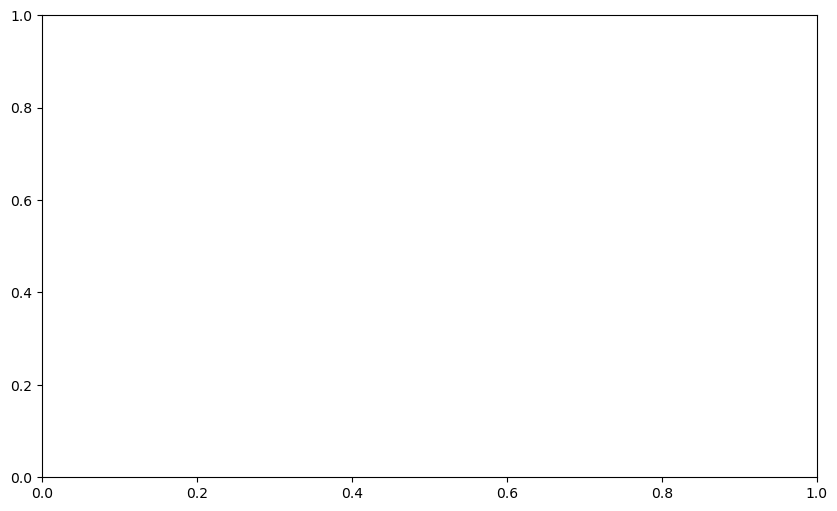

In [77]:

fig, ax = plt.subplots(figsize=(10, 6)) 
gdf.plot(column='DESC_CAT', cmap='RdYlGn', legend=True, ax=ax,
         legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0)})



In [74]:
import pandas as pd

In [73]:
df1 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_500m.csv")
df2 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_2km.csv")
df3 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_1km.csv")

In [72]:
df1_selected = df1[['Clipped Length']].rename(columns={'Clipped Length': '500m'}) 
df2_selected = df2[['Clipped Length']].rename(columns={'Clipped Length': '1km'})
df3_selected = df3[['Clipped Length']].rename(columns={'Clipped Length': '2km'})


In [71]:
combined_df = pd.concat([df1_selected, df2_selected, df3_selected], axis=1)
combined_df

,500m,1km,2km
0,0.000000,4105.071929,1737.578127
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.000000,4742.594204,0.000000
7,0.000000,3768.699188,1651.037322
8,998.256694,3995.377215,1997.702572
9,998.851756,3995.378997,1997.676500


In [70]:
combined_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_all.csv")
combined_df

,500m,1km,2km
0,0.000000,4105.071929,1737.578127
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.000000,4742.594204,0.000000
7,0.000000,3768.699188,1651.037322
8,998.256694,3995.377215,1997.702572
9,998.851756,3995.378997,1997.676500


['Coupe']

In [86]:
sol1km=pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_1km_test.csv")
sol1km

,Unnamed: 0,id,Type sol,1km_Superficie_m2,500m_Superficie_k2
0,0,0,Agricole,9073871.85,9.07
1,1,0,Anthropique,1439019.20,1.44
2,2,0,Forestier,58680881.63,58.68
3,3,0,Humide,190490.51,0.19
4,4,1,Agricole,64137309.83,64.14
...,...,...,...,...,...
83,83,14,Anthropique,64281826.95,64.28
84,84,14,Aquatique,124545.78,0.12
85,85,14,Coupe et régénérat,17588.76,0.02
86,86,14,Forestier,65650497.56,65.65


In [93]:
new_name = 'Coupe'
sol1km.loc[sol1km['Type sol'] == 'Coupe et régénérat', 'Type sol'] = new_name

In [94]:
sol1km[sol1km['Type sol'].str.contains('Coupe', case=False, na=False)]

,Unnamed: 0,id,Type sol,1km_Superficie_m2,500m_Superficie_k2
7,7,1,Coupe,17772.62,0.02
14,14,2,Coupe,9122.18,0.01
21,21,3,Coupe,6580.81,0.01
27,27,4,Coupe,206317.69,0.21
34,34,5,Coupe,64622.13,0.06
39,39,6,Coupe,52473.68,0.05
44,44,7,Coupe,62798.18,0.06
50,50,8,Coupe,7914.74,0.01
61,61,10,Coupe,66925.84,0.07
67,67,11,Coupe,400549.34,0.40


C:\Users\thier\AppData\Local\Temp\ipykernel_20488\637816496.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn', n_types)


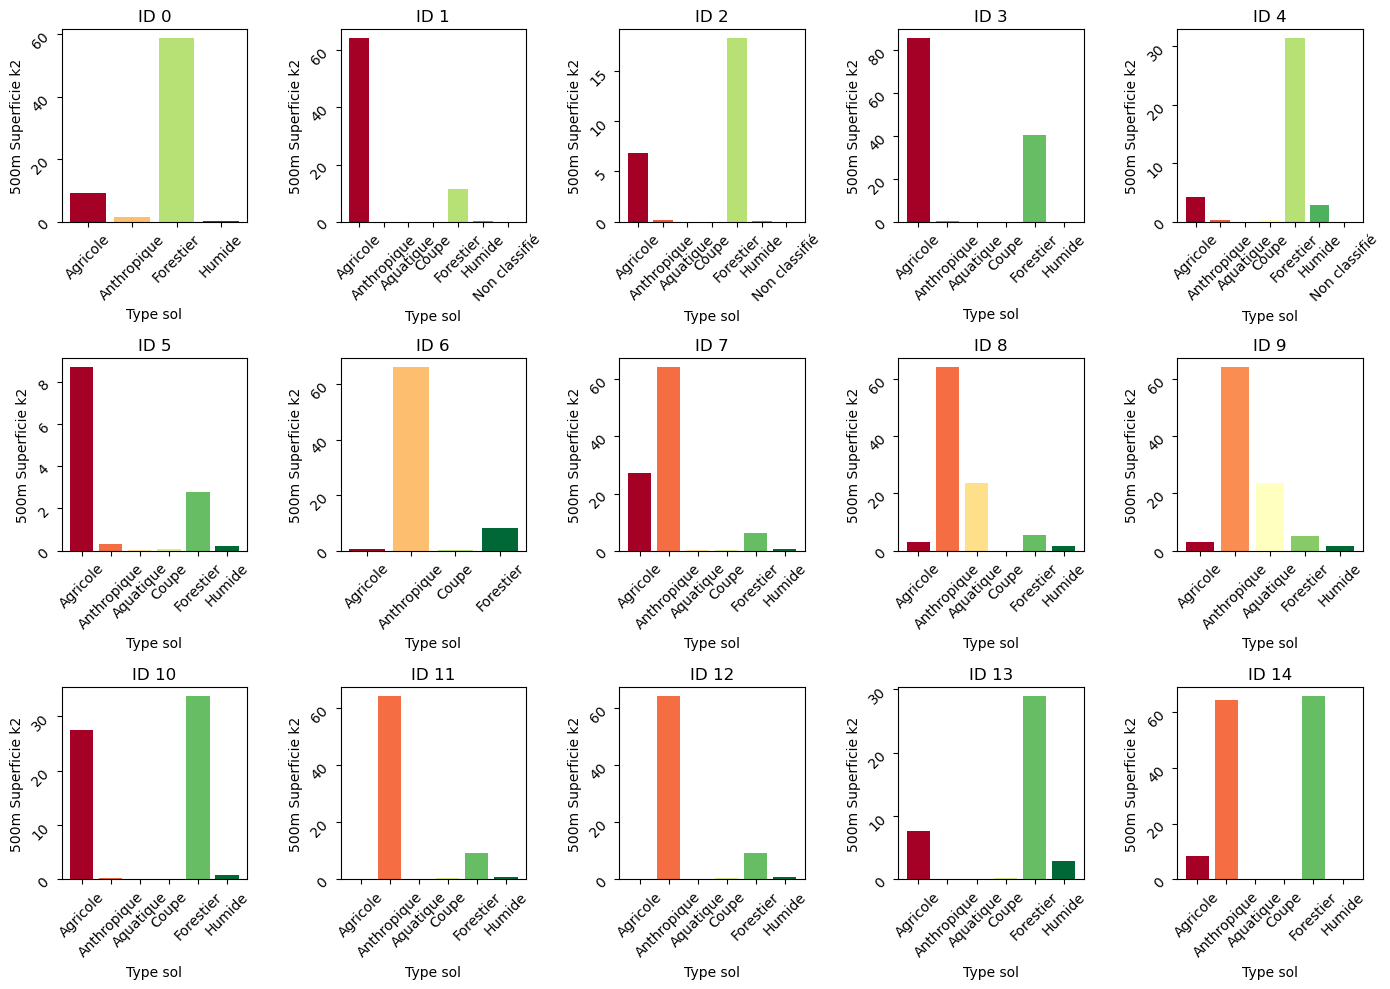

In [95]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define the layout of your subplots (3 rows and 5 columns)
fig, axs = plt.subplots(3, 5, figsize=(14, 10))  # Adjust the size as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(15):  
    sol_specific = sol1km[sol1km['id'] == i]
    ax = axs[i]

    # Plotting
    types = sol_specific['Type sol'].unique()
    n_types = len(types)
    
    # Create a color map
    cmap = cm.get_cmap('RdYlGn', n_types)
    colors = [cmap(i) for i in range(n_types)]

    for j, type in enumerate(types):
        ax.bar(type, sol_specific[sol_specific['Type sol'] == type]['500m_Superficie_k2'], 
               color=colors[j])
    
    ax.set_title(f'ID {i}')
    ax.set_xlabel('Type sol')
    ax.set_ylabel('500m Superficie k2')
    ax.tick_params(labelrotation=45)  # Rotate labels

# Adjust layout
plt.tight_layout()

# Show the full plot
plt.show()
